# generate / update a DataDiVR backend project 

In [ ]:
# functions to mimick uploading process (generate folders, files on the backend)

# PROCESS STEPS 
# do something with a Graph 
# generate JSON files per layout for the Graph (temporary solution?)
# use those JSON to generate folders, files like textures, nodes.json, links.json etc.. 

Number of nodes:  34
Number of Links:  78


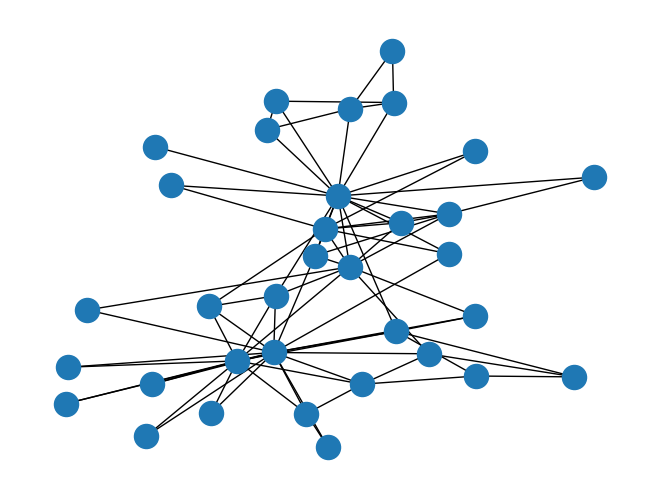

In [6]:
# generate a graph 
import networkx as nx 

G = nx.karate_club_graph()
print("Number of nodes: ", len(G.nodes()))
print("Number of Links: ", len(G.edges()))

nx.draw(G)

In [ ]:
# generate graph layouts i.e. node positions 
posG3D_1_pre = nx.spring_layout(G, dim=3, k=0.1, iterations=100)
posG3D_1 = {key: value.tolist() for key, value in posG3D_1_pre.items()}

posG3D_2_pre = nx.spring_layout(G, dim=3, k=0.1, iterations=200)
posG3D_2= {key: value.tolist() for key, value in posG3D_2_pre.items()}

posG3D_3_pre =nx.spring_layout(G, dim=3, k=0.1, iterations=500)
posG3D_3 = {key: value.tolist() for key, value in posG3D_3_pre.items()}

In [ ]:
# hex color values 
d_nodecolors_hex = dict(zip(G.nodes(),['#FF2300']*len(G.nodes())))
l_linkcolors_hex = '#ff0000'

# rgba color values
d_nodecolors_rgba = dict(zip(G.nodes(),[(255,35,0,120)]*len(G.nodes())))
l_linkcolors_rgba = (0,255,0,100)

# hex8 color values
d_nodecolors_hex8 = dict(zip(G.nodes(),['#0000ffaa']*len(G.nodes())))
l_linkcolors_hex8 = '#0080ffaa'

### JSON 

In [7]:
import json

In [8]:
# ===============================================
# NODE ANNOTATION - a list of strings
# ===============================================

l_annotations_json = []
for g in G.nodes():
    sublist = ["Node: "+str(g)]
    l_annotations_json.append(sublist)
        
d_annotations = dict(zip(G.nodes(), l_annotations_json))
nx.set_node_attributes(G, d_annotations, name="annotation")

# ===============================================
# GRAPH NAME AND DESCRIPTION - a string each
# ===============================================

G.graph['graphtitle']  = "Zachary Karateclub Graph"
G.graph['graphdesc'] = "A toy graph for testing purposes. Number of nodes: "+str(num_nodes)+", Links: "+ str(len(G.edges()))+"."

# ===============================================
# NODE COLORS - a dict with keys = node id as in G.nodes and values = color as hex or rgba
# LINK COLORS - a list of hex or rgba colors per edge as in G.edges or one color for all edges
# ===============================================
#                     a n d 
# ===============================================
# NODE POSITIONS - a dict with keys = G.nodes and values = coordinates (x,y) or (x,y,z)
# ===============================================

# first Layout - rgba
G_rgba = G.copy()
G_rgba.name = '01-graph-rgbacolors'
nx.set_node_attributes(G_rgba, d_nodecolors_rgba, name="nodecolor")
nx.set_edge_attributes(G_rgba, l_linkcolors_rgba, name="linkcolor")
nx.set_node_attributes(G_rgba, posG3D_first, name="pos")

# second Layout - hex
G_hex = G.copy()
G_hex.name = '02-graph-hexcolors'
nx.set_node_attributes(G_hex, d_nodecolors_hex, name="nodecolor")
nx.set_edge_attributes(G_hex, l_linkcolors_hex, name="linkcolor")
nx.set_node_attributes(G_hex, posG3D_second, name="pos")

# third Layout - hex8
G_hex8 = G.copy()
G_hex8.name = '03-graph-hex8colors'
nx.set_node_attributes(G_hex8, d_nodecolors_hex8, name="nodecolor")
nx.set_edge_attributes(G_hex8, l_linkcolors_hex8, name="linkcolor")
nx.set_node_attributes(G_hex8, posG3D_third, name="pos")


# fourth layout - cluster key next level communities
# artifical groups of graph for cluster colors 
G_clusters = G.copy()
G_clusters.name = '04-graph-clustershex8colors'


clustername_1 = 'group 1'
clustername_2 = 'group 2'
clustername_3 = 'group 3'

# nodes into groups
for g in G_clusters.nodes():
    if g < len(G_clusters.nodes()) / 3:
        G_clusters.nodes[g]['cluster'] = clustername_1
    elif g < 2 * len(G_clusters.nodes()) / 3:
        G_clusters.nodes[g]['cluster'] = clustername_2
    else:
        G_clusters.nodes[g]['cluster'] = clustername_3

# node colors 
d_nodecolors_clusters = {}
nodes_group1 = []
nodes_group2 = []
nodes_group3 = []
for n in G_clusters.nodes(): 
    if G_clusters.nodes[n]['cluster'] == clustername_1:
        d_nodecolors_clusters[n] = '#0000ffaa'
        nodes_group1.append(n)
    elif G_clusters.nodes[n]['cluster'] == clustername_2:
        d_nodecolors_clusters[n] = '#00ff00aa'
        nodes_group2.append(n)
    elif G_clusters.nodes[n]['cluster'] == clustername_3:
        d_nodecolors_clusters[n] = '#ff0000aa'
        nodes_group3.append(n)

# link colors
d_linkcolors_clusters = {}
for edge in G_clusters.edges():
    if edge[0] in nodes_group1 and edge[1] in nodes_group1:
        d_linkcolors_clusters[edge] = '#0000ffaa'
       
    elif edge[0] in nodes_group2 and edge[1] in nodes_group2:
        d_linkcolors_clusters[edge] = '#00ff00aa'
       
    elif edge[0] in nodes_group3 and edge[1] in nodes_group3:
        d_linkcolors_clusters[edge] = '#ff0000aa'
       
    else:
        d_linkcolors_clusters[edge] = '#B1B1B150'

l_linkcolors_clusters = list(d_linkcolors_clusters.values())

nx.set_node_attributes(G_clusters, d_nodecolors_clusters, name="nodecolor")
nx.set_node_attributes(G_clusters, posG3D_fourth, name="pos")
nx.set_edge_attributes(G_clusters, {edge: color for edge, color in zip(G_clusters.edges(), l_linkcolors_clusters)}, "linkcolor")



In [1]:
import networkx as nx
import random
import json

def generate_random_rgba():
    red = random.randint(0, 255)
    green = random.randint(0, 255)
    blue = random.randint(0, 255)
    alpha = random.randint(0, 255)  # Random alpha value between 0 and 1
    
    rgba_color = (red, green, blue, alpha)
    return rgba_color


def rgba_to_hex8(rgba_color):
    # Convert values to hexadecimal and format them
    hex_red = format(rgba_color[0], '02X')
    hex_green = format(rgba_color[1], '02X')
    hex_blue = format(rgba_color[2], '02X')
    hex_alpha = format(rgba_color[3], '02X')
    
    # Combine values into an 8-character hexadecimal color code
    color_hex = f"#{hex_red}{hex_green}{hex_blue}{hex_alpha}"
    
    return color_hex


### define graph

In [2]:
num_nodes = 1000

# The distance threshold for forming edges
radius = 0.18

G = nx.random_geometric_graph(num_nodes, radius, dim=3)
print('nodes : ',len(G.nodes()))
print('edges : ',len(G.edges()))

nodes :  1000
edges :  10010


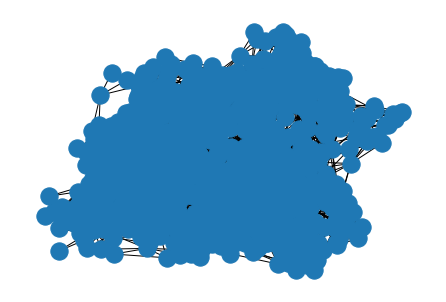

In [3]:
nx.draw(G)

### define node positions 

In [4]:
posG3D_first = dict(zip(G.nodes(),list(nx.get_node_attributes(G, 'pos').values())))

posG3D_second_pre = nx.spring_layout(G, dim=3, k=0.1, iterations=50)
posG3D_second = {key: value.tolist() for key, value in posG3D_second_pre.items()}


posG3D_third_pre = nx.spectral_layout(G, dim=3, weight=None, scale=1, center=None)
posG3D_third = {key: value.tolist() for key, value in posG3D_third_pre.items()}

posG3D_fourth_pre = nx.spring_layout(G, dim=3, k=0.1, iterations=200)
posG3D_fourth = {key: value.tolist() for key, value in posG3D_fourth_pre.items()}

In [5]:
# hex color values 
d_nodecolors_hex = dict(zip(G.nodes(),['#FF2300']*len(G.nodes())))
l_linkcolors_hex = '#ff0000'

# rgba color values
d_nodecolors_rgba = dict(zip(G.nodes(),[(255,35,0,120)]*len(G.nodes())))
l_linkcolors_rgba = (0,255,0,100)

# hex8 color values
d_nodecolors_hex8 = dict(zip(G.nodes(),['#0000ffaa']*len(G.nodes())))
l_linkcolors_hex8 = '#0080ffaa'

# G JSON

In [6]:
# ===============================================
# NODE ANNOTATION - a list of strings
# ===============================================

l_annotations_json = []
for g in G.nodes():
    sublist = ["Node: "+str(g)]
    l_annotations_json.append(sublist)
        
d_annotations = dict(zip(G.nodes(), l_annotations_json))
nx.set_node_attributes(G, d_annotations, name="annotation")


In [10]:
# ===============================================
# GRAPH NAME AND DESCRIPTION - a string each
# ===============================================

G.graph['graphtitle']  = "Random Geometric Graph"
G.graph['graphdesc'] = "A testgraph generated with nx.random_geometric. Number of nodes: "+str(num_nodes)+", Links: "+ str(len(G.edges()))+"."

# ===============================================
# NODE COLORS - a dict with keys = node id as in G.nodes and values = color as hex or rgba
# LINK COLORS - a list of hex or rgba colors per edge as in G.edges or one color for all edges
# ===============================================
#                     a n d 
# ===============================================
# NODE POSITIONS - a dict with keys = G.nodes and values = coordinates (x,y) or (x,y,z)
# ===============================================

# first Layout - rgba
G_rgba = G.copy()
G_rgba.name = '01-graph-rgbacolors'
nx.set_node_attributes(G_rgba, d_nodecolors_rgba, name="nodecolor")
nx.set_edge_attributes(G_rgba, l_linkcolors_rgba, name="linkcolor")
nx.set_node_attributes(G_rgba, posG3D_first, name="pos")

# second Layout - hex
G_hex = G.copy()
G_hex.name = '02-graph-hexcolors'
nx.set_node_attributes(G_hex, d_nodecolors_hex, name="nodecolor")
nx.set_edge_attributes(G_hex, l_linkcolors_hex, name="linkcolor")
nx.set_node_attributes(G_hex, posG3D_second, name="pos")

# third Layout - hex8
G_hex8 = G.copy()
G_hex8.name = '03-graph-hex8colors'
nx.set_node_attributes(G_hex8, d_nodecolors_hex8, name="nodecolor")
nx.set_edge_attributes(G_hex8, l_linkcolors_hex8, name="linkcolor")
nx.set_node_attributes(G_hex8, posG3D_third, name="pos")


# fourth layout - cluster key next level communities
# artifical groups of graph for cluster colors 
G_clusters = G.copy()
G_clusters.name = '04-graph-clustershex8colors'


clustername_1 = 'group 1'
clustername_2 = 'group 2'
clustername_3 = 'group 3'

# nodes into groups
for g in G_clusters.nodes():
    if g < len(G_clusters.nodes()) / 3:
        G_clusters.nodes[g]['cluster'] = clustername_1
    elif g < 2 * len(G_clusters.nodes()) / 3:
        G_clusters.nodes[g]['cluster'] = clustername_2
    else:
        G_clusters.nodes[g]['cluster'] = clustername_3

# node colors 
d_nodecolors_clusters = {}
nodes_group1 = []
nodes_group2 = []
nodes_group3 = []
for n in G_clusters.nodes(): 
    if G_clusters.nodes[n]['cluster'] == clustername_1:
        d_nodecolors_clusters[n] = '#0000ffaa'
        nodes_group1.append(n)
    elif G_clusters.nodes[n]['cluster'] == clustername_2:
        d_nodecolors_clusters[n] = '#00ff00aa'
        nodes_group2.append(n)
    elif G_clusters.nodes[n]['cluster'] == clustername_3:
        d_nodecolors_clusters[n] = '#ff0000aa'
        nodes_group3.append(n)

# link colors
d_linkcolors_clusters = {}
for edge in G_clusters.edges():
    if edge[0] in nodes_group1 and edge[1] in nodes_group1:
        d_linkcolors_clusters[edge] = '#0000ffaa'
       
    elif edge[0] in nodes_group2 and edge[1] in nodes_group2:
        d_linkcolors_clusters[edge] = '#00ff00aa'
       
    elif edge[0] in nodes_group3 and edge[1] in nodes_group3:
        d_linkcolors_clusters[edge] = '#ff0000aa'
       
    else:
        d_linkcolors_clusters[edge] = '#B1B1B150'

l_linkcolors_clusters = list(d_linkcolors_clusters.values())

nx.set_node_attributes(G_clusters, d_nodecolors_clusters, name="nodecolor")
nx.set_node_attributes(G_clusters, posG3D_fourth, name="pos")
nx.set_edge_attributes(G_clusters, {edge: color for edge, color in zip(G_clusters.edges(), l_linkcolors_clusters)}, "linkcolor")


In [8]:
# check graph data with:
#nx.node_link_data(G_rgba)

In [11]:
# ===============================================
# export to json file for upload 
# ===============================================

Graphs = [G_rgba, G_hex, G_hex8, G_clusters]

for ix,graph in enumerate(Graphs):
    G_json = json.dumps(nx.node_link_data(graph), indent=4)
    with open(graph.name+".json", "w") as outfile:
        outfile.write(G_json)
